In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'../../../data/BreadBasket_DMS.csv')

In [3]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


## Goal: Cluster different customers of the Bakery

In [4]:
df['datetime'] = pd.to_datetime(df.Date + ' '+ df.Time)

In [5]:
df.head()

,Date,Time,Transaction,Item,datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [6]:
df.drop(['Date','Time'], axis=1, inplace=True)

In [7]:
df.head()

,Transaction,Item,datetime
0,1,Bread,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34
2,2,Scandinavian,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57


In [8]:
df.Item.nunique()

95

In [9]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [10]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
other_food = [x for x in df.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

In [11]:
df['beverage'] = df.Item.isin(beverage).astype(int)
df['other'] = df.Item.isin(other).astype(int)
df['kids'] = df.Item.isin(kids).astype(int)
df['snacks'] = df.Item.isin(snacks).astype(int)
df['bread'] = df.Item.isin(bread).astype(int)
df['breakfast_pastry'] = df.Item.isin(breakfast_pastry).astype(int)
df['breakfast'] = df.Item.isin(breakfast).astype(int)
df['dessert'] = df.Item.isin(dessert).astype(int)
df['condiments'] = df.Item.isin(condiments).astype(int)
df['lunch'] = df.Item.isin(lunch).astype(int)
df['other_food'] = df.Item.isin(other_food).astype(int)

In [12]:
df.head()

,Transaction,Item,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
0,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,1,0,0


In [13]:
df_group = df.groupby(['Transaction','datetime']).sum()
df_group.reset_index(level='datetime', inplace=True)

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_3589/1216434758.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = df.groupby(['Transaction','datetime']).sum()


In [14]:
df_group['hour']=df_group.datetime.dt.hour
df_group['weekday']=df_group.datetime.dt.day_name()

In [15]:
df_group.head()

,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday
Transaction,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,9,Sunday
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0,10,Sunday
3,2016-10-30 10:07:57,1,0,0,0,0,0,0,1,1,0,0,10,Sunday
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0,10,Sunday
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0,10,Sunday


In [16]:
df_group.weekday.value_counts()

Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: weekday, dtype: int64

<AxesSubplot: >

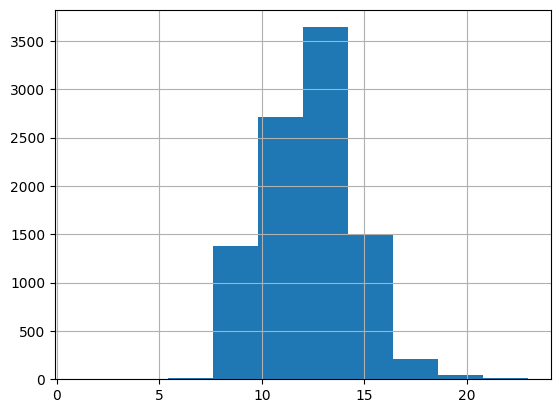

In [17]:
df_group.hour.hist()

In [18]:
df_group.datetime.dt.month.value_counts()

11    2154
3     1768
12    1696
2     1630
1     1598
4      510
10     175
Name: datetime, dtype: int64

In [19]:
df_group.drop('datetime', axis=1, inplace=True)

In [20]:
df_ml = pd.get_dummies(data = df_group, columns=['weekday'], drop_first=True).copy()

In [21]:
df_ml.head()

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Transaction,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0


# PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(0.85)
pca.fit(df_ml)
df_pca = pca.transform(df_ml)

In [24]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,6)])

# Clustering


In [25]:
from sklearn.cluster import KMeans

In [26]:
! pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 5.8 MB/s eta 0:00:0000:01


In [27]:
from yellowbrick.cluster import KElbowVisualizer

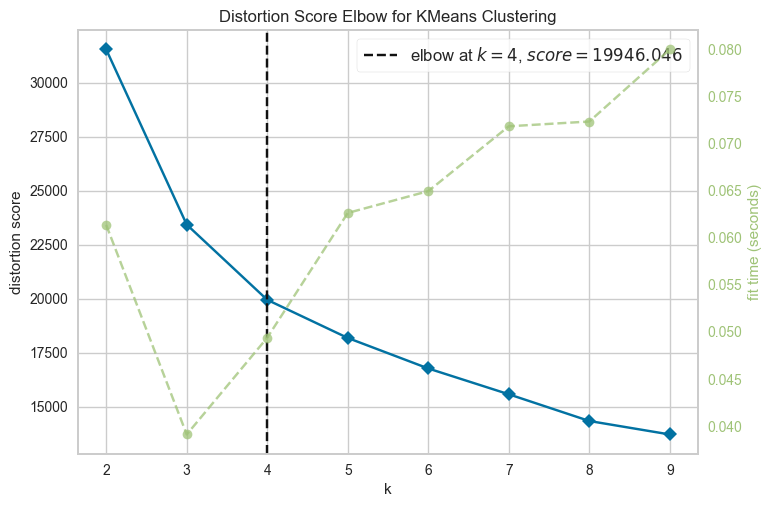

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(df_pca)
visualizer.poof()

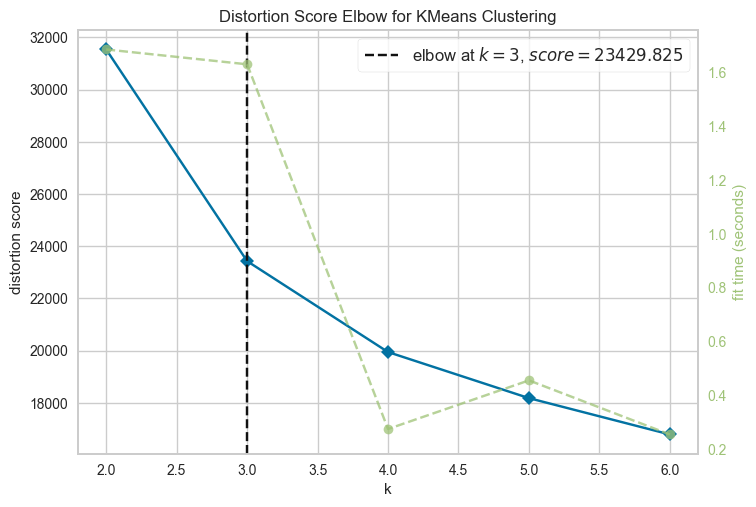

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,7))
visualizer.fit(df_pca)
visualizer.poof()

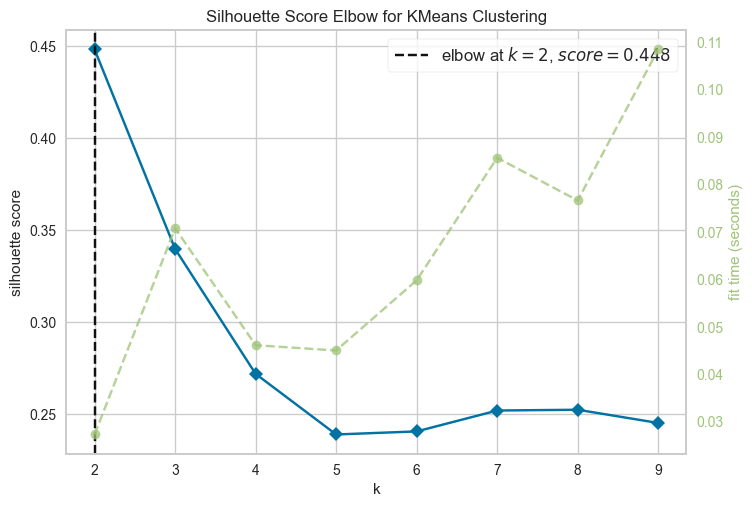

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [30]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10), metric='silhouette')
visualizer.fit(df_pca)
visualizer.poof()

In [31]:
model = KMeans(5)
model.fit(df_pca)
y_pred = model.predict(df_pca)

In [32]:
y_pred

array([2, 2, 2, ..., 4, 4, 1], dtype=int32)

In [33]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 914, 1779, 2630, 2191, 2017]))

In [34]:
model.cluster_centers_

array([[ 2.05623853e-01,  1.42097729e+00,  2.79860035e-01,
        -1.01255014e-01,  7.99861239e-04],
       [-3.60497140e+00, -2.14984734e-02,  3.49131553e-02,
         4.87121741e-03,  6.29002350e-02],
       [ 2.85949845e+00, -4.12794941e-02, -7.82176599e-03,
         9.90706741e-05,  3.84422202e-02],
       [ 6.77865751e-01, -3.51541754e-01, -6.27282139e-02,
         2.79054371e-02, -4.68214856e-02],
       [-1.37847341e+00, -1.89258505e-01, -7.92730860e-02,
         1.11451754e-02, -5.51054811e-02]])

In [35]:
df_ml['cluster'] = model.labels_

In [36]:
df_ml.head()

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,cluster
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0,2
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0,2
3,1,0,0,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0,2
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0,2
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0,2


In [37]:
df_group['cluster'] = model.labels_

In [38]:
import seaborn as sns

In [39]:
sns.set()

<AxesSubplot: xlabel='cluster', ylabel='weekday'>

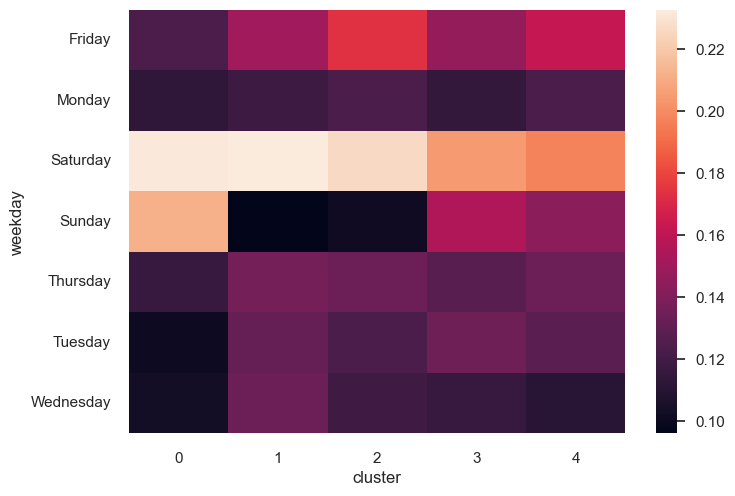

In [40]:
sns.heatmap(pd.crosstab(df_group.weekday, df_group.cluster, normalize='columns'))

<AxesSubplot: xlabel='cluster', ylabel='hour'>

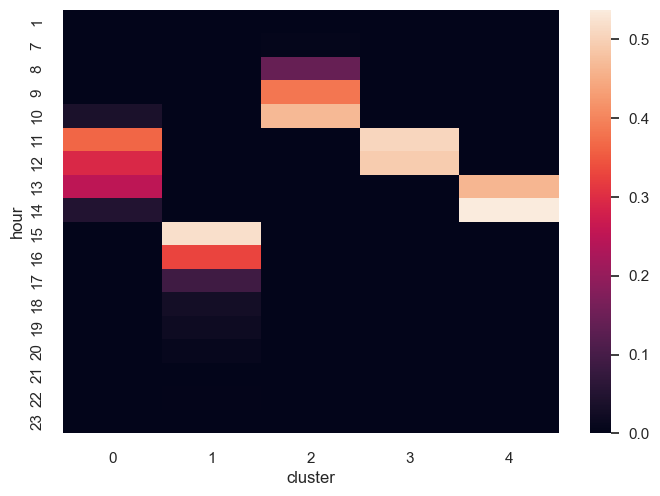

In [41]:
sns.heatmap(pd.crosstab(df_group.hour, df_group.cluster, normalize='columns'))

In [42]:
items = df[['Transaction', 'Item']]

In [43]:
clusters = df_group['cluster'].reset_index()

In [44]:
merged = pd.merge(items, clusters, on='Transaction')

In [45]:
merged.groupby('cluster').Item.apply(lambda x: (x.value_counts(normalize=True).nlargest(5)*100).round()).astype(int)

cluster               
0        Coffee           35
         Tea               9
         Hot chocolate     5
         Bread             4
         Sandwich          4
1        Coffee           23
         Bread            14
         Tea               9
         Cake              8
         Hot chocolate     5
2        Coffee           29
         Bread            20
         Pastry            8
         Medialuna         5
         Tea               5
3        Bread            23
         Coffee           21
         NONE              5
         Pastry            4
         Cake              4
4        Coffee           21
         Bread            15
         Sandwich          7
         Tea               7
         Cake              6
Name: Item, dtype: int64

<AxesSubplot: xlabel='cluster', ylabel='hour'>

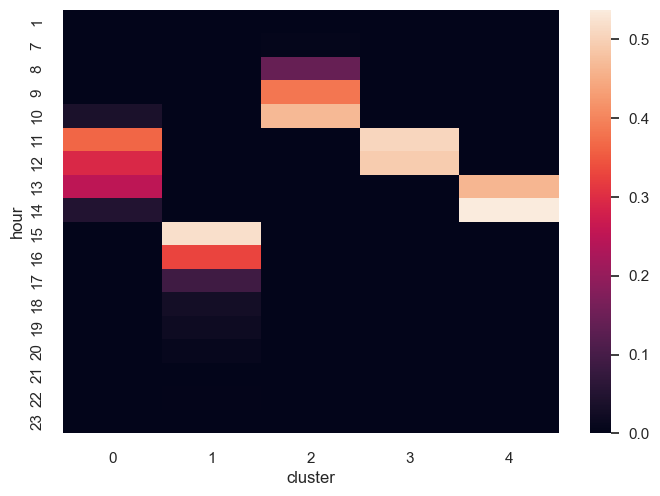

In [46]:
sns.heatmap(pd.crosstab(df_group.hour, df_group.cluster, normalize='columns'))

# Approach #2. Just KMeans


In [47]:
model = KMeans(5)
model.fit(df_ml.drop('cluster', axis=1))
model.labels_

array([3, 3, 0, ..., 1, 1, 4], dtype=int32)

In [48]:
df_ml.cluster = model.labels_

In [49]:
df_group.cluster = model.labels_

In [50]:
df_group.cluster.value_counts()

1    2112
3    1976
0    1836
2    1827
4    1780
Name: cluster, dtype: int64

<AxesSubplot: xlabel='cluster', ylabel='weekday'>

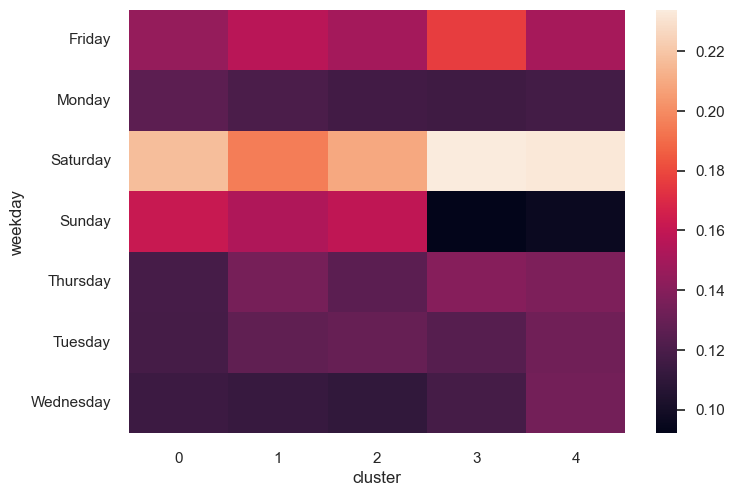

In [51]:
sns.heatmap(pd.crosstab(df_group.weekday, df_group.cluster, normalize='columns'))

<AxesSubplot: xlabel='cluster', ylabel='hour'>

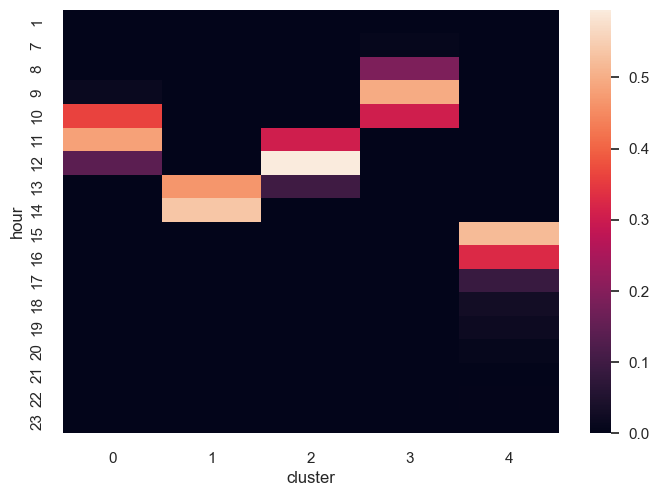

In [52]:
sns.heatmap(pd.crosstab(df_group.hour, df_group.cluster, normalize='columns'))

In [53]:
clusters = df_group['cluster'].reset_index()
merged = pd.merge(items, clusters, on='Transaction')
merged.groupby('cluster').Item.apply(lambda x: (x.value_counts(normalize=True).nlargest(5)*100).round()).astype(int)

cluster               
0        Coffee           40
         Tea               8
         Bread             5
         Pastry            5
         NONE              4
1        Coffee           24
         Bread            10
         Tea               8
         Sandwich          8
         Cake              6
2        Bread            30
         Coffee           12
         NONE              5
         Sandwich          4
         Pastry            4
3        Bread            27
         Coffee           23
         Pastry            9
         Medialuna         6
         Tea               4
4        Coffee           23
         Bread            14
         Tea               9
         Cake              8
         Hot chocolate     5
Name: Item, dtype: int64

# Last approach. Scale down + PCA + KMeans

In [54]:
df_ml.hour = df_ml.hour/24

In [55]:
pca = PCA(0.85)
pca.fit(df_ml.drop('cluster', axis = 1))
df_pca = pca.transform(df_ml.drop('cluster', axis = 1))

In [56]:
model = KMeans(5)
model.fit(df_pca)

KMeans(n_clusters=5)

In [57]:
df_ml.cluster = model.labels_
df_group.cluster = model.labels_

In [58]:
df_group.cluster.value_counts()

0    2816
2    2695
1    1631
4    1269
3    1120
Name: cluster, dtype: int64

<AxesSubplot: xlabel='cluster', ylabel='weekday'>

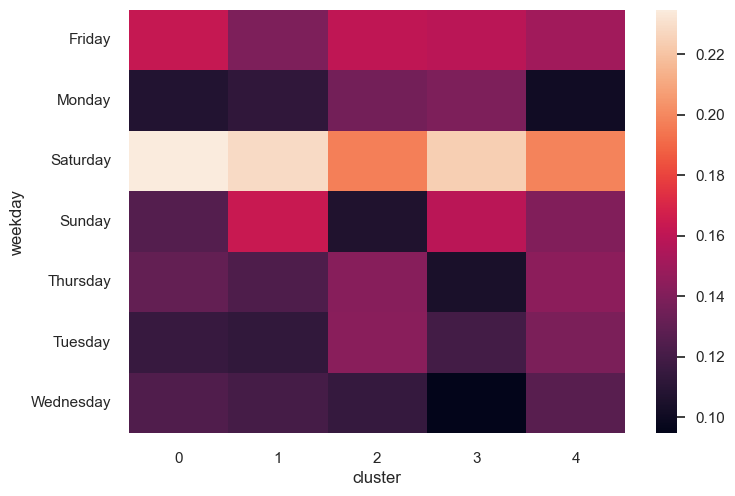

In [59]:
sns.heatmap(pd.crosstab(df_group.weekday, df_group.cluster, normalize='columns'))

<AxesSubplot: xlabel='cluster', ylabel='hour'>

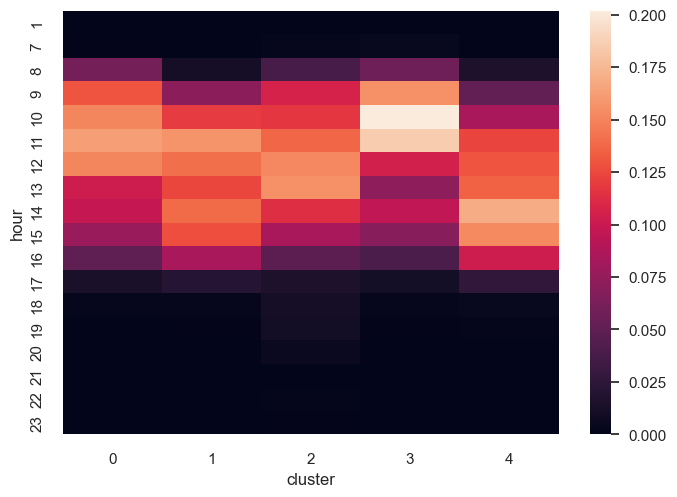

In [60]:
sns.heatmap(pd.crosstab(df_group.hour, df_group.cluster, normalize='columns'))

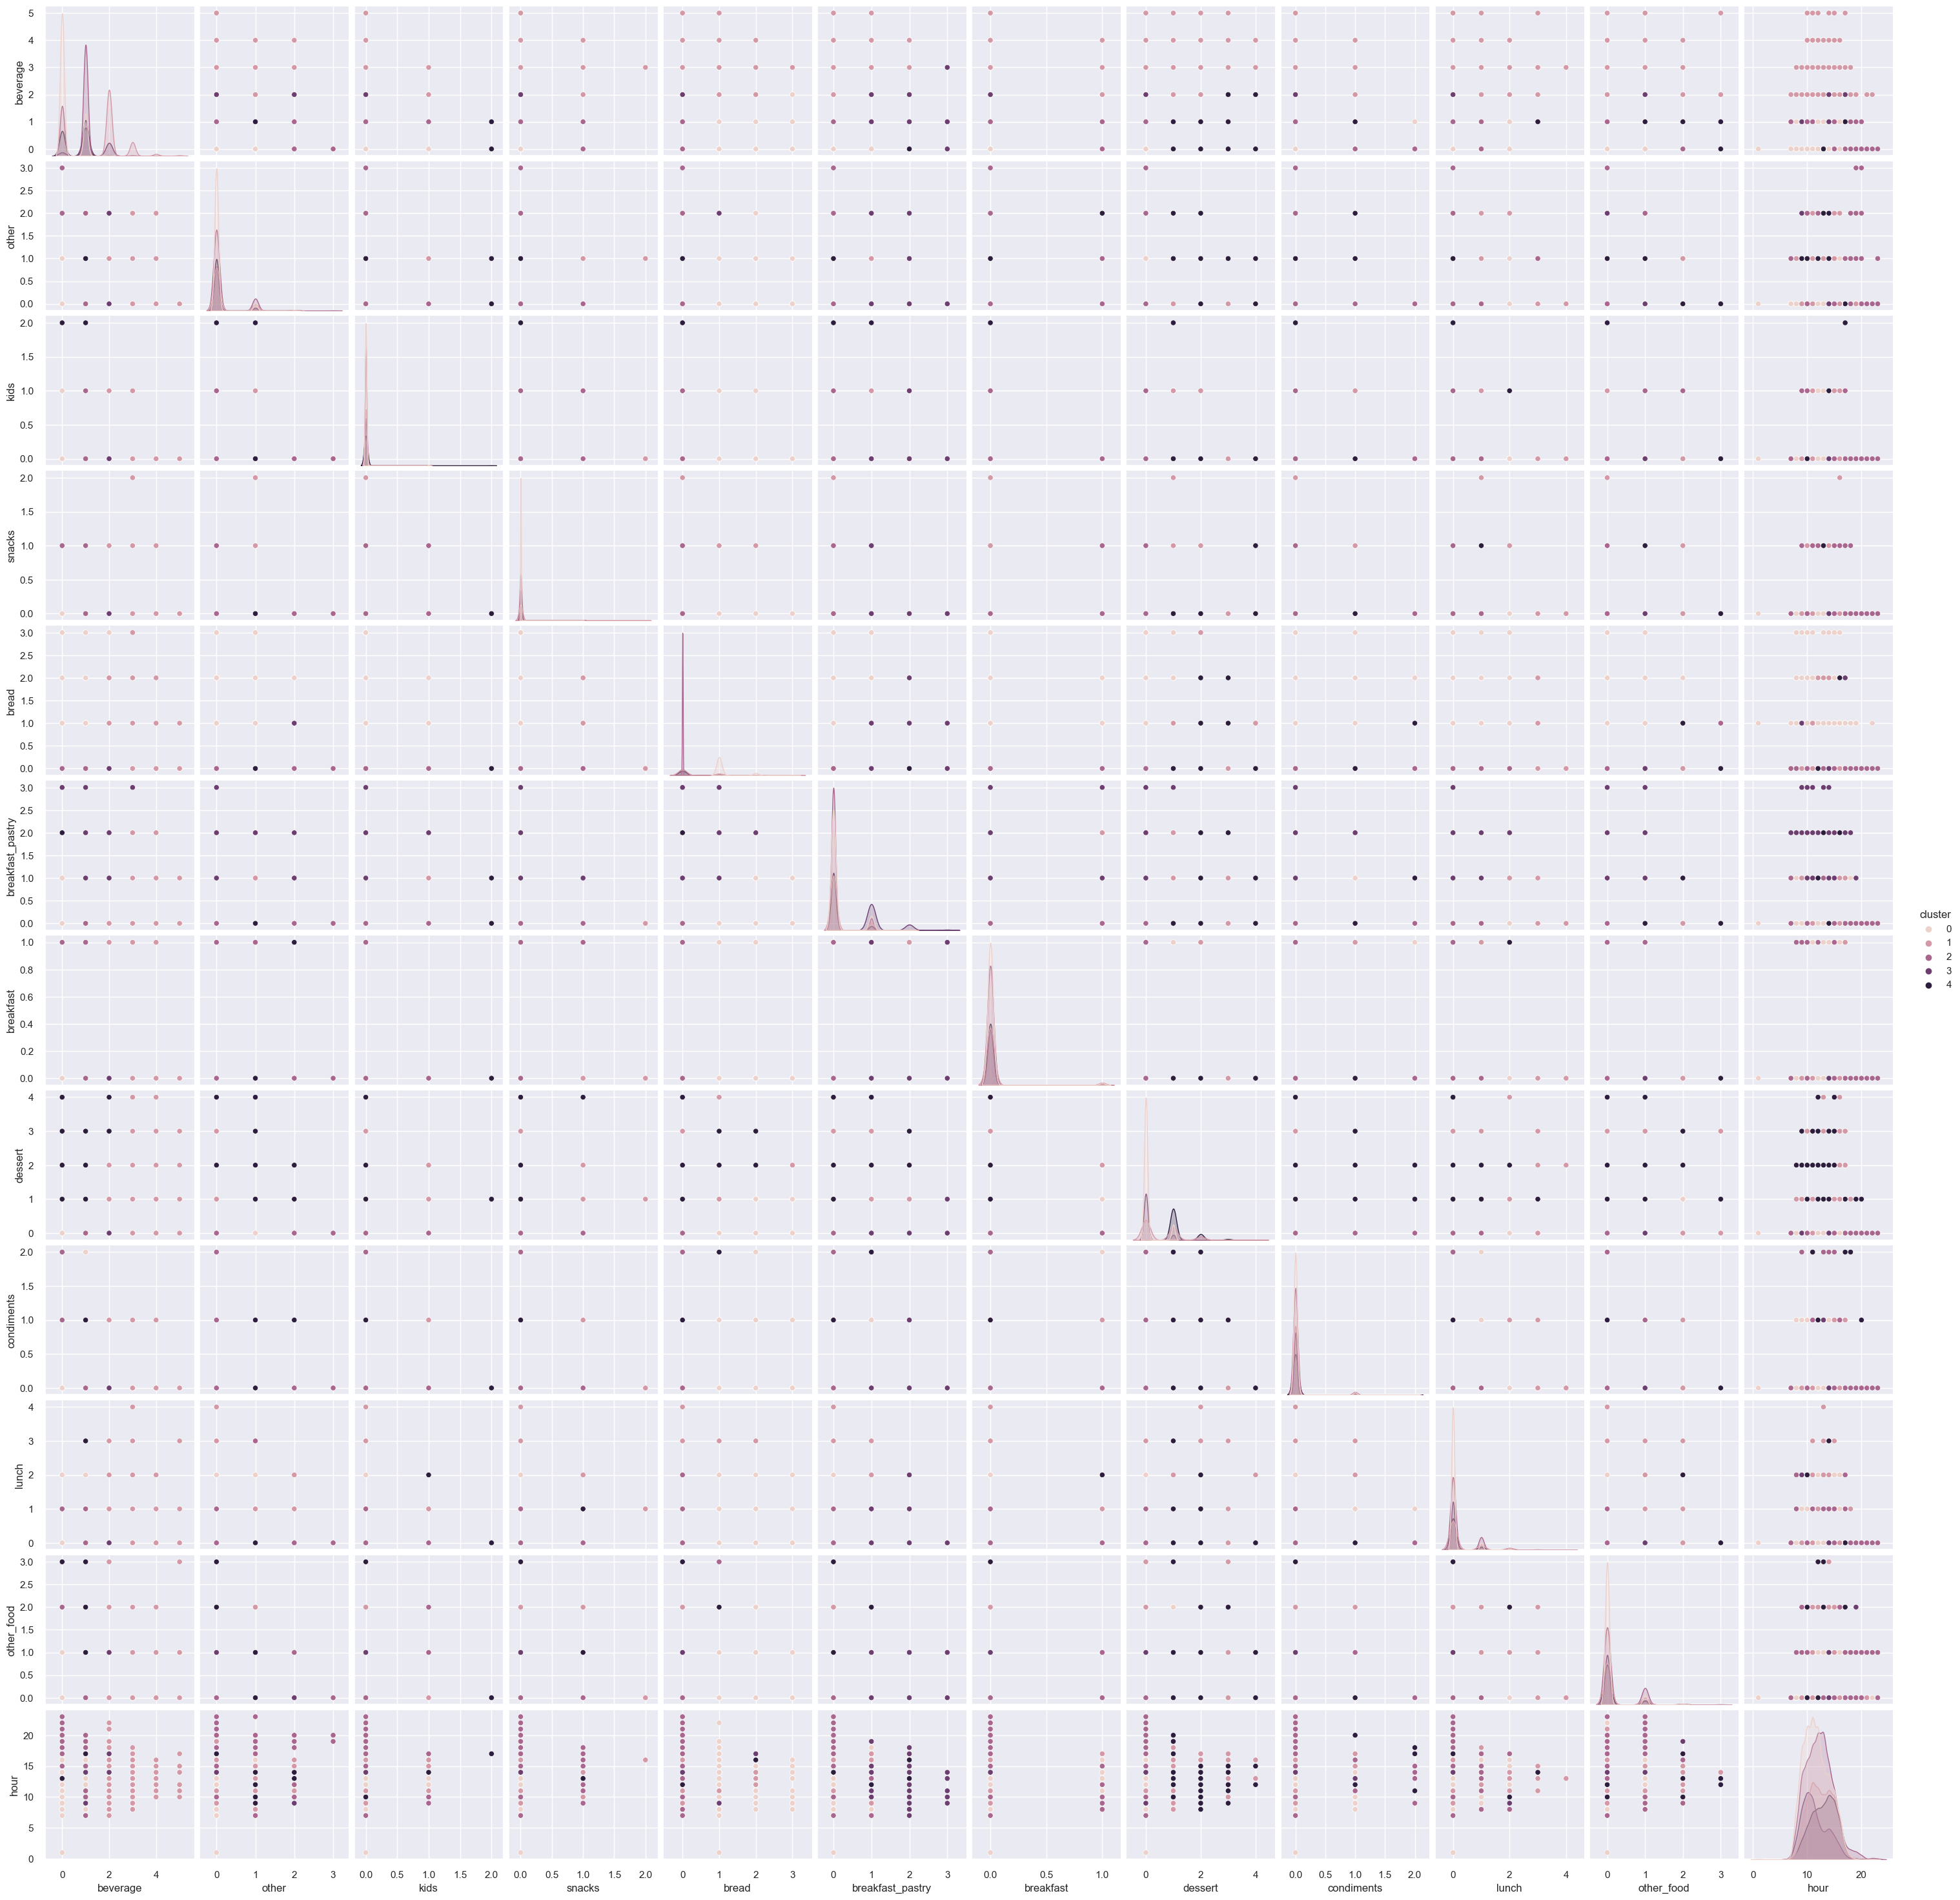

In [61]:
sns.pairplot(df_group, hue='cluster')

In [62]:
clusters = df_group['cluster'].reset_index()
merged = pd.merge(items, clusters, on='Transaction')
merged.groupby('cluster').Item.apply(lambda x: (x.value_counts(normalize=True).nlargest(5)*100).round()).astype(int)

cluster               
0        Bread            51
         Coffee            9
         Scandinavian      5
         Toast             3
         Pastry            3
1        Coffee           35
         Tea              10
         Cake              6
         Hot chocolate     5
         Bread             5
2        Coffee           37
         Tea               8
         NONE              8
         Sandwich          8
         Farm House        7
3        Coffee           30
         Pastry           16
         Medialuna        12
         Bread             7
         Muffin            6
4        Cake             18
         Coffee           15
         Cookies           8
         Brownie           7
         Bread             6
Name: Item, dtype: int64

# Evaluation

In [63]:
from sklearn.datasets import make_moons, make_blobs

In [64]:
from sklearn.cluster import AgglomerativeClustering

In [65]:
X,y = make_blobs(random_state = 42)

In [66]:
X.shape

(100, 2)

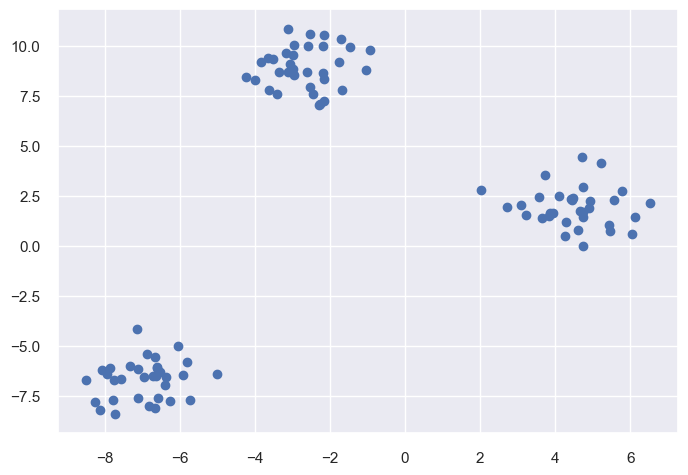

In [67]:
plt.scatter(X[:,0], X[:,1])

In [68]:
km = KMeans(3)
ac = AgglomerativeClustering(3)

In [69]:
km.fit(X)
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

In [70]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [71]:
km_labels = km.labels_
ac_labels = ac.labels_

In [72]:
print('Silhouette score for KMeans is', silhouette_score(X, km_labels))
print('Silhouette score for Agglomerative is', silhouette_score(X, ac_labels))

Silhouette score for KMeans is 0.8469881221532085
Silhouette score for Agglomerative is 0.8469881221532085


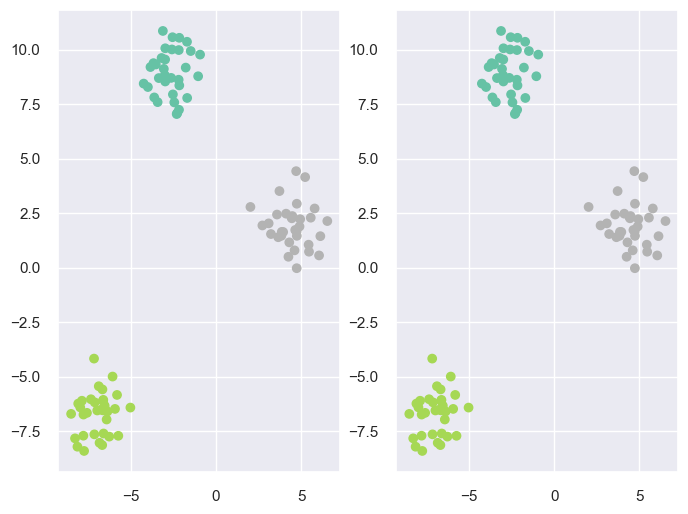

In [73]:
_, [ax1, ax2] = plt.subplots(1,2, figsize=(8,6))
ax1.scatter(X[:,0], X[:,1], c = km_labels, cmap='Set2')
ax2.scatter(X[:,0], X[:,1], c = ac_labels, cmap='Set2')

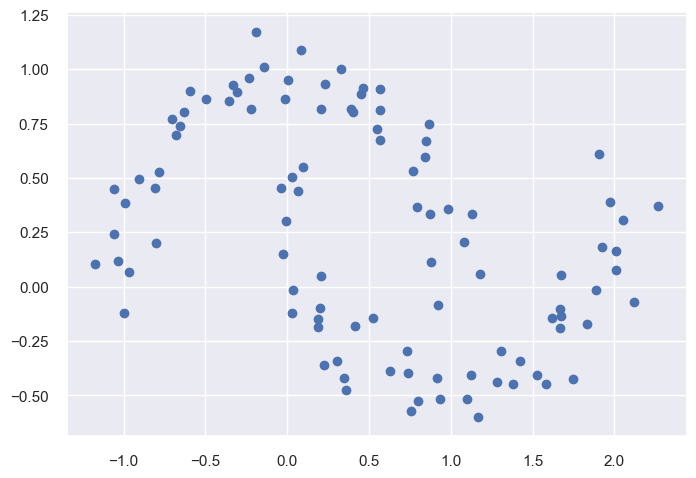

In [74]:
X,y = make_moons(random_state = 42, noise=0.1)
plt.scatter(X[:,0], X[:,1])

In [75]:
km = KMeans(2)
ac = AgglomerativeClustering(2, linkage='single')
km.fit(X)
ac.fit(X)
km_labels = km.labels_
ac_labels = ac.labels_

In [76]:
print('Silhouette score for KMeans is', silhouette_score(X, km_labels))
print('Silhouette score for Agglomerative is', silhouette_score(X, ac_labels))

Silhouette score for KMeans is 0.47670426630964785
Silhouette score for Agglomerative is 0.3075102992009325


In [77]:
print('Davies-Bouldin score for KMeans is', davies_bouldin_score(X, km_labels))
print('Davies-Bouldin for Agglomerative is', davies_bouldin_score(X, ac_labels))

Davies-Bouldin score for KMeans is 0.7835429631981142
Davies-Bouldin for Agglomerative is 1.1904671758172505


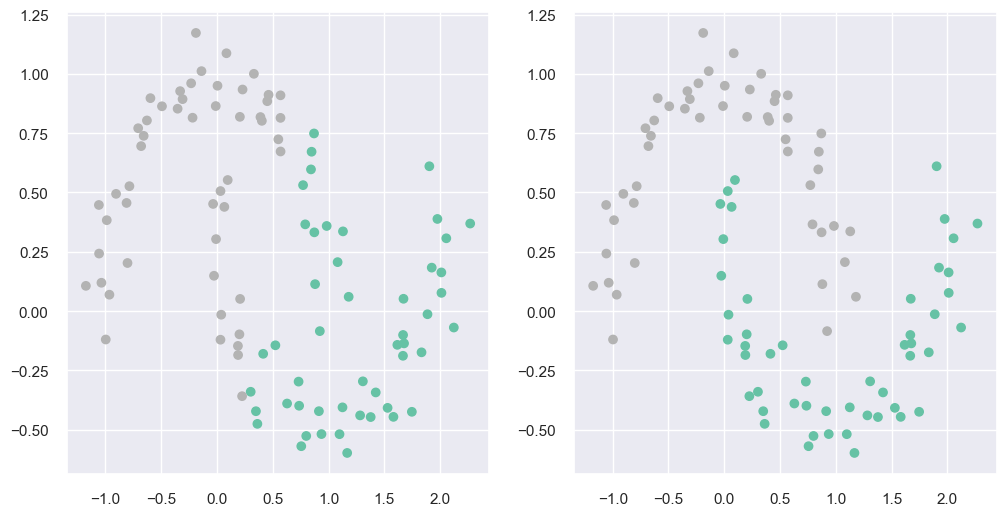

In [78]:
_, [ax1, ax2] = plt.subplots(1,2, figsize=(12,6))
ax1.scatter(X[:,0], X[:,1], c = km_labels, cmap='Set2')
ax2.scatter(X[:,0], X[:,1], c = ac_labels, cmap='Set2')